In [1]:
# EDA 5/24

In [3613]:
import os
from glob import glob
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import cv2
import re
from collections import Counter

In [3]:
train_dir = '/opt/ml/input/data/train_dataset'

In [4]:
# all train images
train_path_all = sorted(glob(os.path.join(train_dir, 'images/*')))

In [3326]:
def read_info(filepath):
    col_name = os.path.basename(filepath).split('.')[0]
    df_info = pd.read_csv(filepath, delimiter='\t', header=None)
    df_info.columns = ['filename', col_name]
    return df_info

source_all = read_info(os.path.join(train_dir, 'source.txt'))
level_all = read_info(os.path.join(train_dir, 'level.txt'))
with open(os.path.join(train_dir, 'gt.txt')) as f:
    gt_all = pd.DataFrame({c: v for c, v in zip(['filename', 'gt'], zip(*map(lambda x: x.split('\t'), list(map(lambda x: x.strip(), f.readlines())))))})
with open(os.path.join(train_dir, 'tokens.txt')) as f:
    tokens_all = [x.strip() for x in f.readlines()]

In [187]:
len(tokens_all)

241

In [188]:
len(source_all), len(level_all), len(gt_all)

(100000, 100000, 100000)

In [189]:
source_all.head()

filename  source
0  train_00000.jpg       1
1  train_00001.jpg       0
2  train_00002.jpg       0
3  train_00003.jpg       1
4  train_00004.jpg       0

In [190]:
level_all.head()

filename  level
0  train_00000.jpg      1
1  train_00001.jpg      2
2  train_00002.jpg      2
3  train_00003.jpg      3
4  train_00004.jpg      4

In [191]:
gt_all.head()

filename                                                 gt
0  train_00000.jpg                                   4 \times 7 = 2 8
1  train_00001.jpg                                      a ^ { x } > q
2  train_00002.jpg                                         8 \times 9
3  train_00003.jpg  \sum _ { k = 1 } ^ { n - 1 } b _ { k } = a _ {...
4  train_00004.jpg                                      I = d q / d t

In [3390]:
def show_image(image_idx, show_gt=True):
    if isinstance(image_idx, int):
        image_path = os.path.join(train_dir, 'images', f'train_{image_idx:05d}.jpg')
    elif isinstance(image_idx, str):
        image_path = image_idx
        image_idx = int(re.findall('[0-9]{5}', image_idx)[0])
    else:
        raise ValueError
    print(image_path)
    
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image)
    plt.axis('off')
    plt.show()
    
    if show_gt:
        print(gt_all.iloc[image_idx, 1].split())

/opt/ml/input/data/train_dataset/images/train_04773.jpg


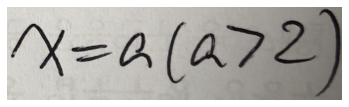

['x', '=', 'a', '\\left(', 'a', '>', '2', '\\right)']


In [3448]:
idx_hand = np.random.randint(len(source_all))
while source_all.iloc[idx_hand, 1] != 1:
    idx_hand = np.random.randint(len(source_all))
show_image(idx_hand)

/opt/ml/input/data/train_dataset/images/train_64793.jpg


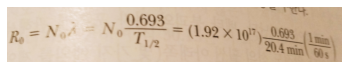

['R', '_', '{', '0', '}', '=', 'N', '_', '{', '0', '}', '\\lambda', '=', 'N', '_', '{', '0', '}', '\\frac', '{', '0', '.', '6', '9', '3', '}', '{', 'T', '_', '{', '1', '/', '2', '}', '}', '=', '\\left(', '1', '.', '9', '2', '\\times', '1', '0', '^', '{', '1', '7', '}', '\\right)', '\\frac', '{', '0', '.', '6', '9', '3', '}', '{', '2', '0', '.', '4', '\\min', '}', '\\left(', '\\frac', '{', '1', '\\min', '}', '{', '6', '0', '\\', 's', '}', '\\right)']


In [3532]:
idx_print = np.random.randint(len(source_all))
while source_all.iloc[idx_print].source != 0:
    idx_print = np.random.randint(len(source_all))
show_image(idx_print)

## 키 큰 이미지 확인하기

In [412]:
abnormal_ratio = []
height_all = []
width_all = []
for image_path in train_path_all:
    height, width, _ = cv2.imread(image_path).shape
    if height >= width:
        abnormal_ratio.append((width / height, image_path))
    height_all.append(height)
    width_all.append(width)

In [3921]:
set(abnormal_ratio) - set(no_need_to_rotate)

{(0.4189189189189189,
  '/opt/ml/input/data/train_dataset/images/train_75242.jpg'),
 (0.43891402714932126,
  '/opt/ml/input/data/train_dataset/images/train_18911.jpg'),
 (0.12773621501801052,
  '/opt/ml/input/data/train_dataset/images/train_38912.jpg'),
 (0.2198557196839574,
  '/opt/ml/input/data/train_dataset/images/train_18990.jpg'),
 (0.3894080996884735,
  '/opt/ml/input/data/train_dataset/images/train_23645.jpg'),
 (0.3545966228893058,
  '/opt/ml/input/data/train_dataset/images/train_98260.jpg'),
 (0.3297180043383948,
  '/opt/ml/input/data/train_dataset/images/train_68445.jpg'),
 (0.39755351681957185,
  '/opt/ml/input/data/train_dataset/images/train_08653.jpg'),
 (0.41294298921417566,
  '/opt/ml/input/data/train_dataset/images/train_40180.jpg'),
 (0.2868937048503612,
  '/opt/ml/input/data/train_dataset/images/train_79282.jpg'),
 (0.13323353293413173,
  '/opt/ml/input/data/train_dataset/images/train_92398.jpg'),
 (0.36959837315709204,
  '/opt/ml/input/data/train_dataset/images/train

In [3669]:
ratio_all = [w / h for h, w in zip(height_all, width_all)]

In [1763]:
no_need_to_rotate = []
need_one_more = [] 

In [3870]:
tall_iter = iter(enumerate(abnormal_ratio))

1 0.12127833925157061 /opt/ml/input/data/train_dataset/images/train_00029.jpg


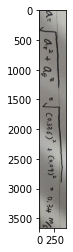

In [3874]:
i, (ratio, sample_tall_file) = next(tall_iter)
sample_tall = cv2.imread(sample_tall_file)
sample_tall = cv2.cvtColor(sample_tall, cv2.COLOR_BGR2RGB)
plt.imshow(sample_tall)
print(i, ratio, sample_tall_file)
plt.show()

In [3872]:
no_need_to_rotate.append((ratio, sample_tall_file))

In [3873]:
no_need_to_rotate = list(set(no_need_to_rotate))
print(f"{len(no_need_to_rotate)} / {len(abnormal_ratio)} = {len(no_need_to_rotate) / len(abnormal_ratio)}")

477 / 2240 = 0.21294642857142856


In [3626]:
[(i, x) for i, x in enumerate(no_need_to_rotate) if not isinstance(x[0], float)]

[(213, '/opt/ml/input/data/train_dataset/images/train_01112.jpg'),
 (387, '/opt/ml/input/data/train_dataset/images/train_01299.jpg'),
 (411, '/opt/ml/input/data/train_dataset/images/train_01619.jpg')]

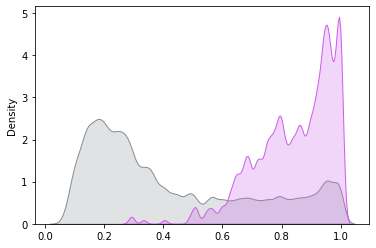

In [3695]:
sns.kdeplot(x=list(zip(*abnormal_ratio))[0], bw_adjust=.25, fill=True, color='#868e96')
sns.kdeplot(x=list(zip(*no_need_to_rotate))[0], bw_adjust=.25, fill=True, color='#cc5de8')
plt.show()

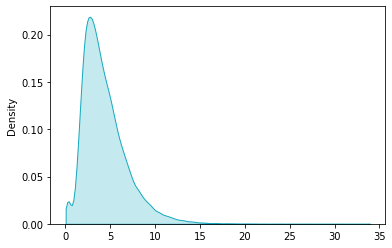

In [3690]:
sns.kdeplot(x=ratio_all, bw_adjust=1, fill=True, color='#15aabf', cut=.15)
plt.show()

In [3691]:
max(ratio_all)

33.922077922077925

0.9730941704035875
/opt/ml/input/data/train_dataset/images/train_69208.jpg


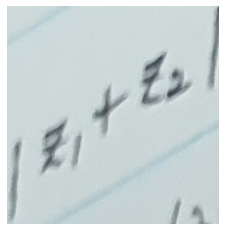

['\\left|', 'z', '_', '{', '1', '}', '+', 'z', '_', '{', '2', '}', '\\right|']


In [3917]:
idx = np.random.choice(list(range(len(no_need_to_rotate))))
print(no_need_to_rotate[idx][0])
show_image(no_need_to_rotate[idx][1])

In [3918]:
no_need_to_rotate

[(0.65625, '/opt/ml/input/data/train_dataset/images/train_12969.jpg'),
 (0.8813559322033898,
  '/opt/ml/input/data/train_dataset/images/train_18861.jpg'),
 (0.6774193548387096,
  '/opt/ml/input/data/train_dataset/images/train_46983.jpg'),
 (0.7758620689655172,
  '/opt/ml/input/data/train_dataset/images/train_86136.jpg'),
 (0.7453183520599251,
  '/opt/ml/input/data/train_dataset/images/train_15994.jpg'),
 (0.7142857142857143,
  '/opt/ml/input/data/train_dataset/images/train_43845.jpg'),
 (0.8958333333333334,
  '/opt/ml/input/data/train_dataset/images/train_16527.jpg'),
 (0.9044943820224719,
  '/opt/ml/input/data/train_dataset/images/train_77770.jpg'),
 (0.6475903614457831,
  '/opt/ml/input/data/train_dataset/images/train_68233.jpg'),
 (0.6888888888888889,
  '/opt/ml/input/data/train_dataset/images/train_10218.jpg'),
 (0.8271375464684015,
  '/opt/ml/input/data/train_dataset/images/train_16119.jpg'),
 (1.0, '/opt/ml/input/data/train_dataset/images/train_27959.jpg'),
 (0.765, '/opt/ml/inpu

## Out of vocab?

In [3372]:
oov = set()
oov_cnt = 0
for gt in gt_all.iloc[: 1]:
    for c in gt.split():
        if c not in tokens_all and c not in gt_all.columns:
            oov.add(c)
            oov_cnt += 1
print(oov, oov_cnt)

set() 0


# Examples

In [3717]:
def idx_to_path(idx):
    return os.path.join(train_dir, "images", f"train_{idx:05d}.jpg")

def show_multi_images(indices, num_rows, num_cols, figsize):
    fig, axes = plt.subplots(num_rows, num_cols, figsize=figsize)
    for i, idx in enumerate(indices):
        i, j = divmod(i, num_cols)
        image = cv2.imread(idx_to_path(idx))
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        if num_rows > 1 and num_cols > 1:
            axes[i, j].axis('off')
            axes[i, j].imshow(image)
        else:
            axes[j].axis('off')
            axes[j].imshow(image)
    if num_rows > 1 and num_cols > 1:
        for i in range(i + 1, num_rows * num_cols):
            i, j = divmod(i, num_cols)
            axes[i, j].axis('off')
    fig.tight_layout()
    fig.show()

### 배경

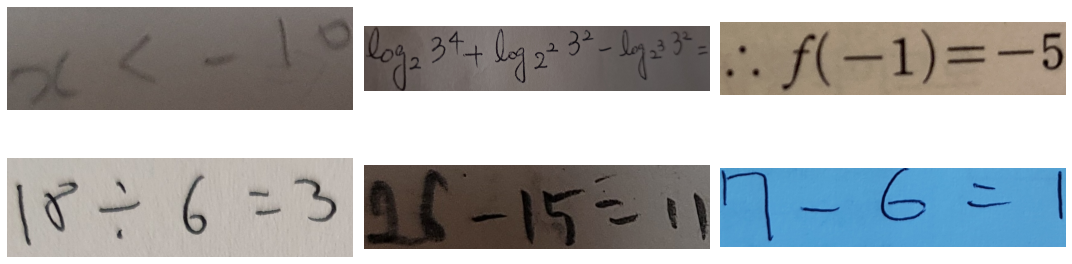

In [3777]:
images = [25827, 23372, 3760, 66036, 57674, 40377]
show_multi_images(images, 2, 3, (15, 5))

### 일정하지 않은 밝기

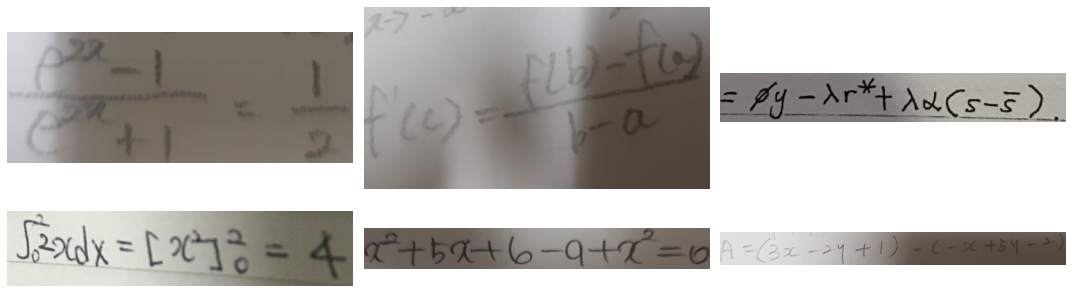

In [3779]:
images = [83399, 31345, 14180, 71023, 90301, 69864]
show_multi_images(images, 2, 3, (15, 5))

### 위/아래 첨자

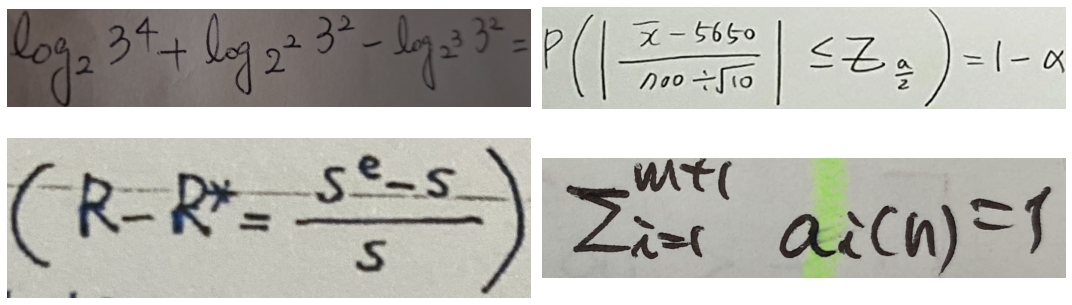

In [3782]:
images = [23372, 23166, 73781, 17609]
show_multi_images(images, 2, 2, (15, 5))

### 일정하지 않은 (그렇게 보이는) 글씨 크기

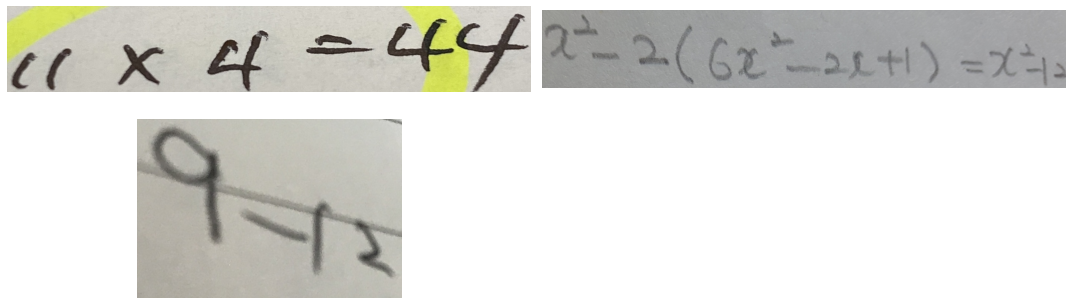

In [3784]:
images = [67774, 12169, 5513]
show_multi_images(images, 2, 2, (15, 5))

### 소문자 혹은 대문자
* Z, X 등등

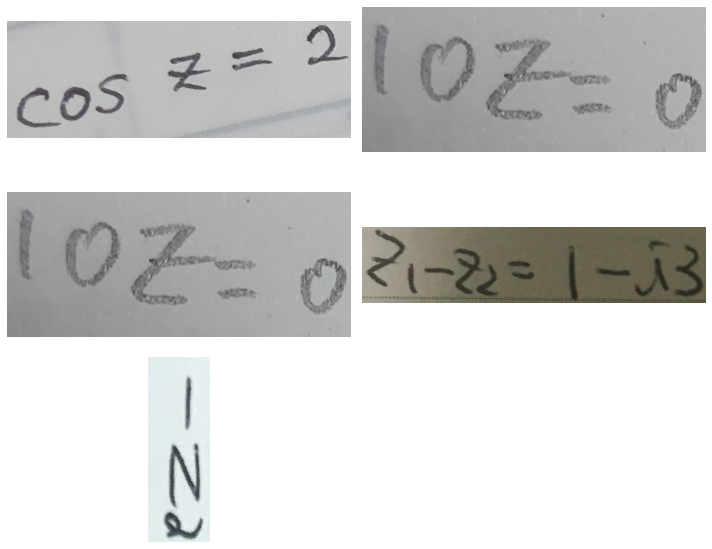

In [3861]:
images = [65511, 67496, 67496, 8518, 77432]
show_multi_images(images, 3, 2, (10, 8))

### 대분수

/opt/ml/input/data/train_dataset/images/train_52073.jpg


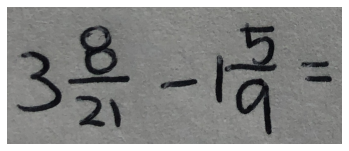

In [3788]:
show_image(52073, show_gt=False)

### 행렬

/opt/ml/input/data/train_dataset/images/train_71594.jpg


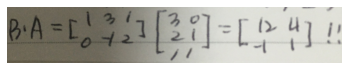

['B', '\\cdot', 'A', '=', '\\left[', '\\begin{matrix}', '1', '&', '3', '&', '1', '\\\\', '0', '&', '-', '1', '&', '2', '\\end{matrix}', '\\right]', '\\left[', '\\begin{matrix}', '3', '&', '0', '\\\\', '2', '&', '1', '\\\\', '1', '&', '1', '\\end{matrix}', '\\right]', '=', '\\left[', '\\begin{matrix}', '1', '2', '&', '4', '\\\\', '-', '1', '&', '1', '\\end{matrix}', '\\right]', '!', '!']


In [3878]:
show_image(71594, show_gt=True)

### 분수 내 숫자 정렬 문제

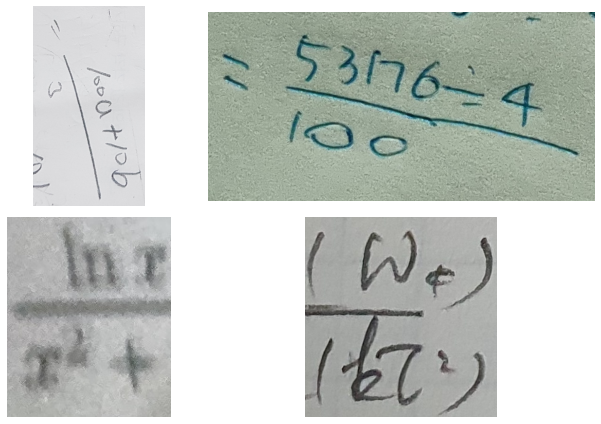

In [3850]:
images = [58664, 79361, 33776, 14071]
show_multi_images(images, 2, 2, (10, 6))

### 애매한 의미

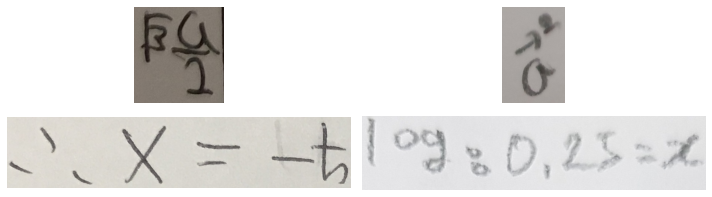

In [3793]:
images = [73463, 80954, 71152, 88703]
show_multi_images(images, 2, 2, (10, 3))

### 저해상도, 흔들림, 초점 안 맞음

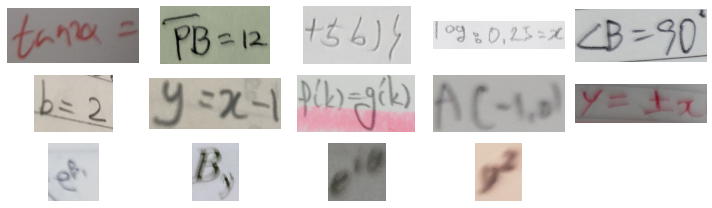

In [3795]:
images = [89744, 38256, 66300, 88703, 38538, 76487, 87216, 41498, 78022, 62535, 29298, 
          42042, 77860, 81037, 19829]
show_multi_images(images, 3, 5, (10, 3))

### 겹친 글씨

/opt/ml/input/data/train_dataset/images/train_64703.jpg


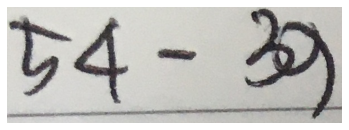

In [3796]:
show_image(64703, show_gt=False)

### 180도 회전 필요

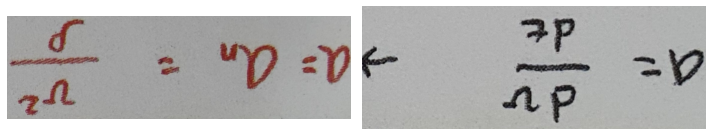

In [3798]:
images = [34157, 12243]
show_multi_images(images, 1, 2, (10, 3))

### 기울어짐, 휘어짐

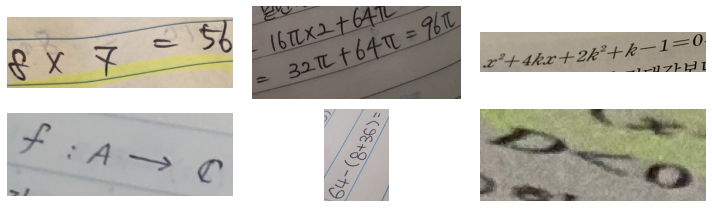

In [3802]:
images = [85476, 32124, 37961, 42430, 12207, 89093]
show_multi_images(images, 2, 3, (10, 3))

### 찌그러짐

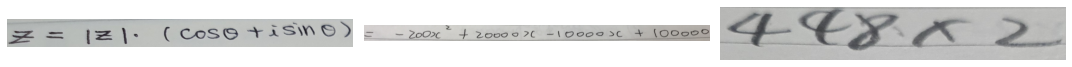

In [3805]:
images = [85867, 11697, 52520]
show_multi_images(images, 1, 3, (15, 5))

### 줄이 삐뚤빼뚤

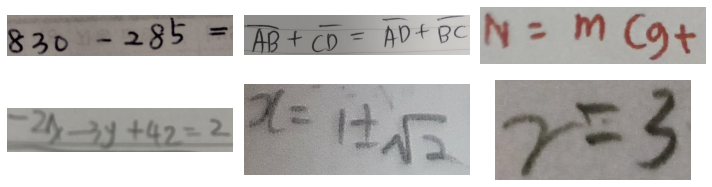

In [3808]:
images = [99146, 87325, 48680, 33471, 59801, 66208]
show_multi_images(images, 2, 3, (10, 3))

### 펜 굵기, 색

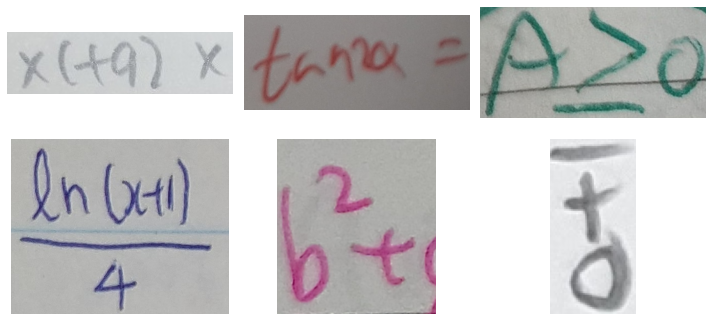

In [3847]:
images = [21807, 89744, 90858, 99892, 88991, 2586]
show_multi_images(images, 2, 3, (10, 5))

### 알아볼 수 있을까?

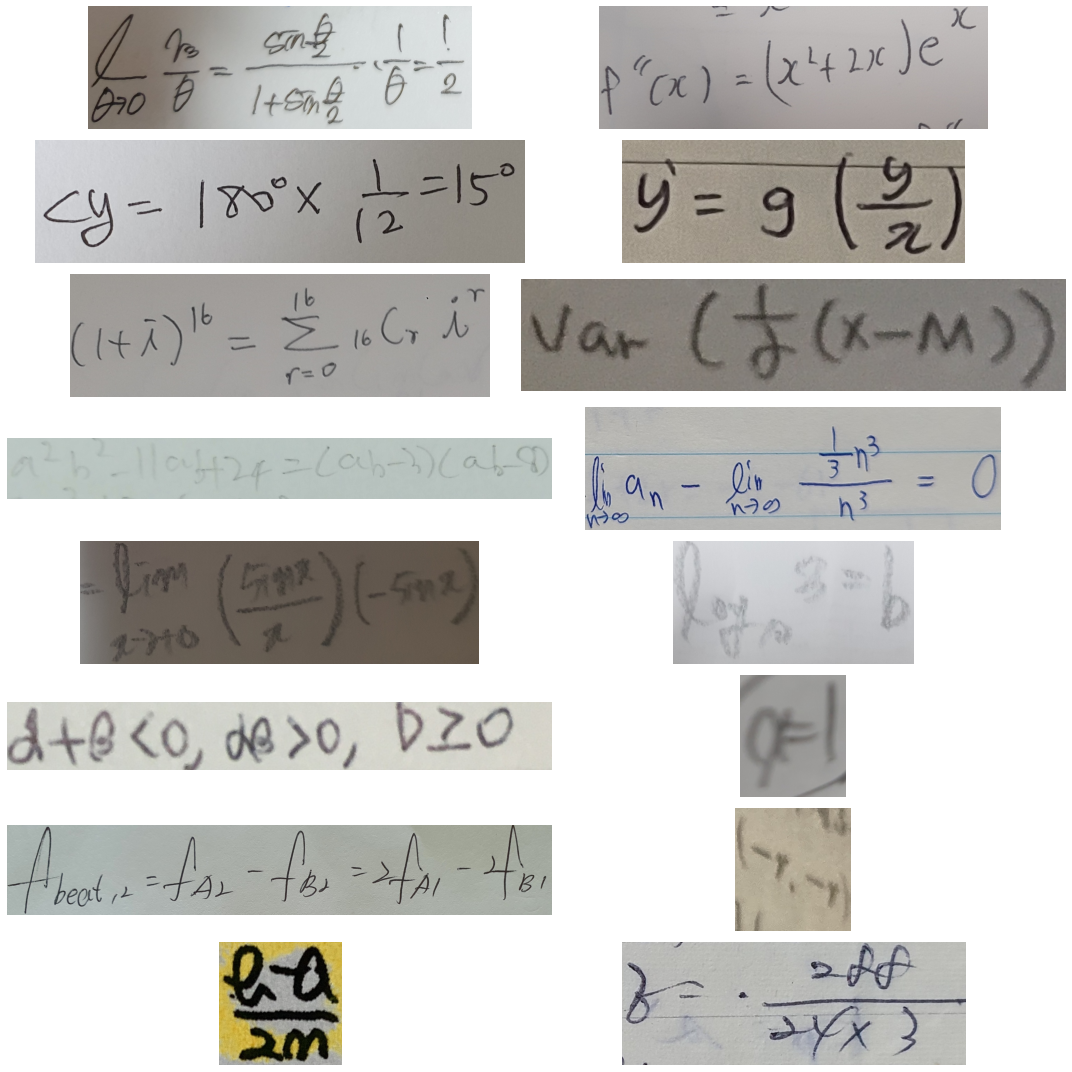

In [3817]:
images = [75709, 42126, 3617, 84313, 8340, 61259, 48292, 6154, 98725, 43398, 30859, 84677,
          95051, 34743, 84381, 95324]
show_multi_images(images, 8, 2, (15, 15))

### 무시해야 할 무늬들

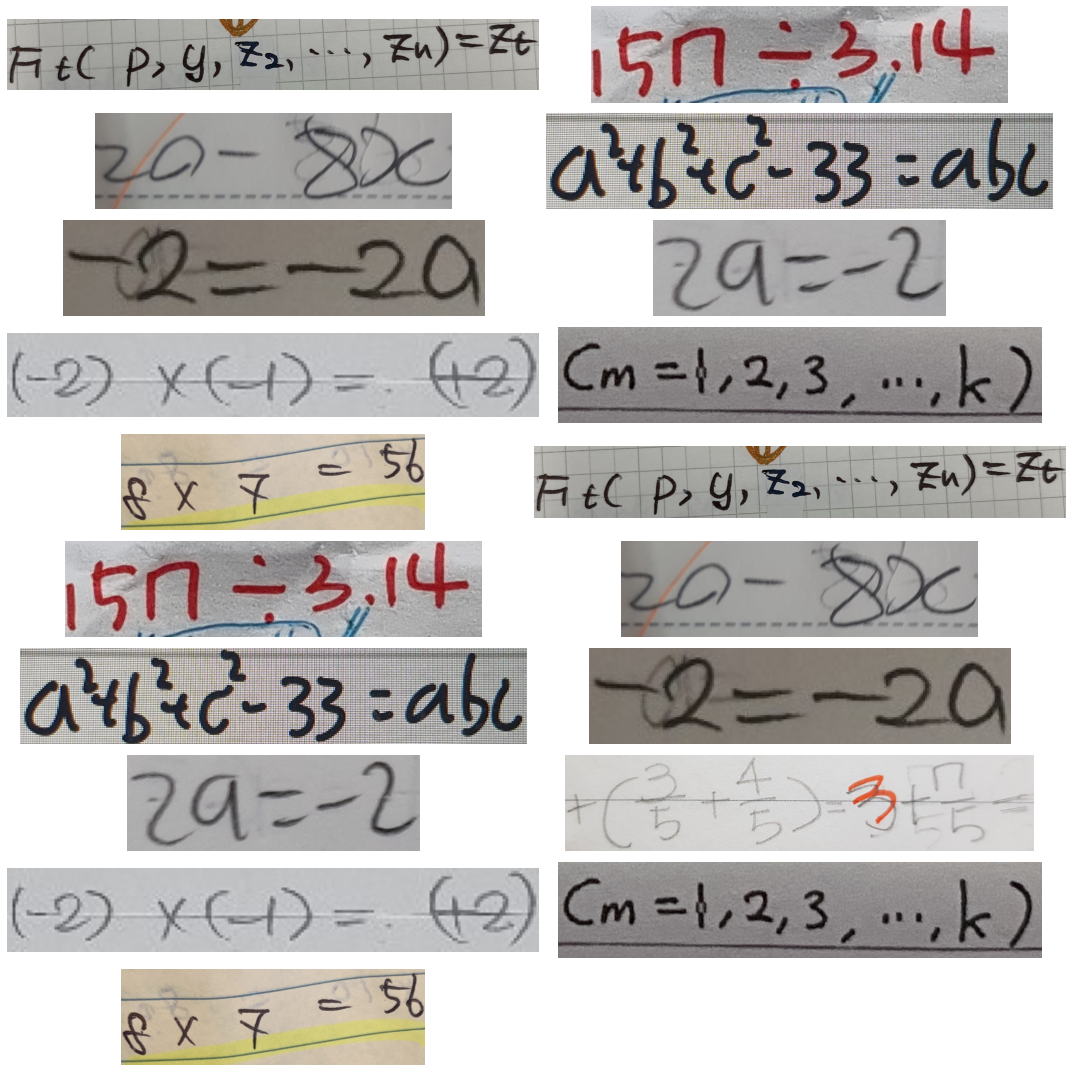

In [3919]:
images = [42562, 22767, 44015, 2801, 98707, 63021, 87109, 6959, 85476, 42562, 22767, 
          44015, 2801, 98707, 63021, 68263, 87109, 6959, 85476]
show_multi_images(images, 10, 2, (15, 15))

### 주변에 다른 수식

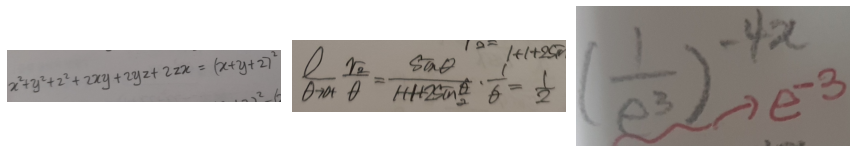

In [3820]:
images = [59085, 66461, 8778]
show_multi_images(images, 1, 3, (12, 3))

### 밑줄
* 필요한 것 vs 무시할 것

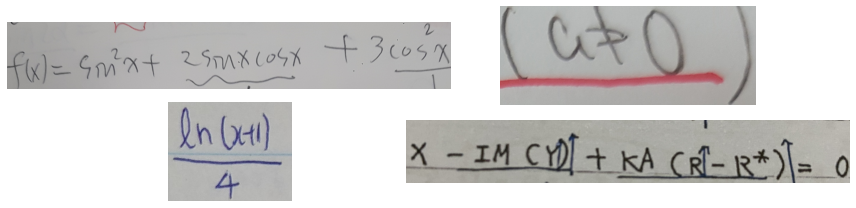

In [3822]:
images = [82268, 23385, 99892, 59678]
show_multi_images(images, 2, 2, (12, 3))

### 형광펜

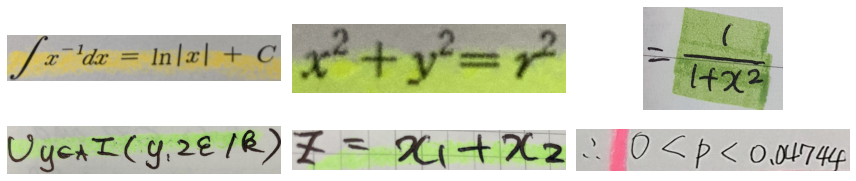

In [3823]:
images = [14477, 22039, 93524, 36683, 74799, 52289]
show_multi_images(images, 2, 3, (12, 3))

### 고친 글씨와 겹친 것

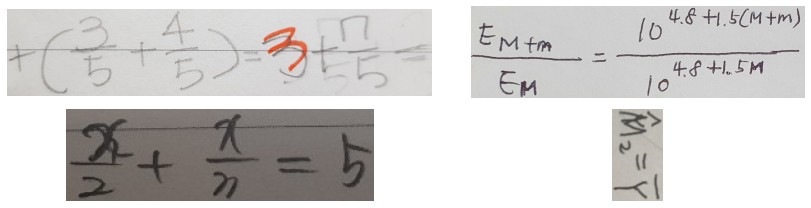

In [3853]:
images = [68263, 5465, 20633, 37056]
show_multi_images(images, 2, 2, (12, 3))

### 공책 줄

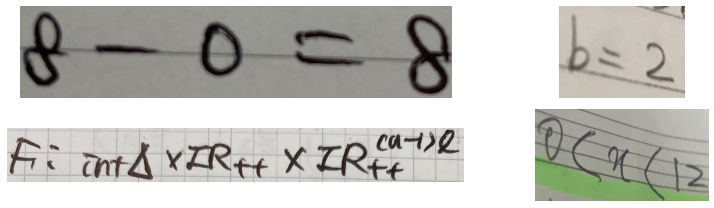

In [3825]:
images = [78699, 76487, 20020, 24696]
show_multi_images(images, 2, 2, (12, 3))

### 액정 위 글씨

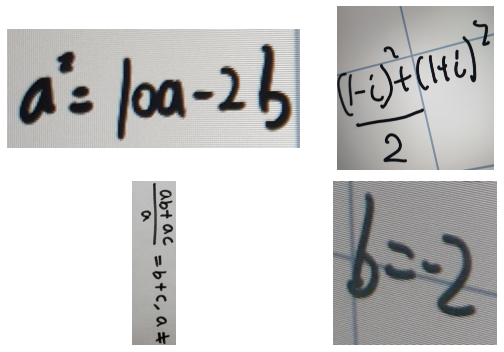

In [3828]:
images = [51200, 23451, 36623, 84100]
show_multi_images(images, 2, 2, (8, 5))

### 비침, 연필자국

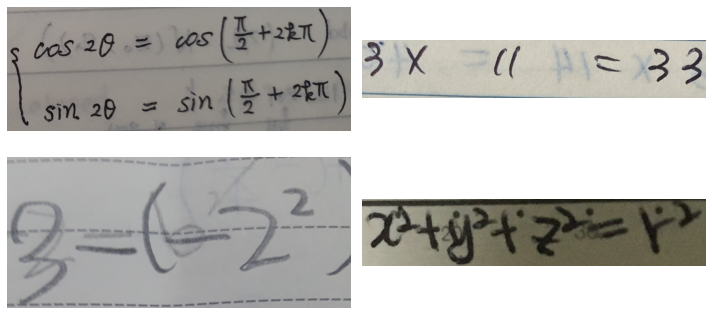

In [3829]:
images = [19282,77709,63334,76558]
show_multi_images(images, 2, 2, (10, 5))

### 글자 밀도

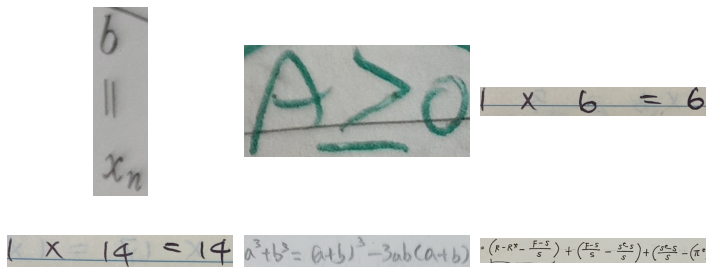

In [3858]:
images = [4441, 90858, 10945, 44519, 26684, 98334]
show_multi_images(images, 2, 3, (10, 5))

### 세로쓰기

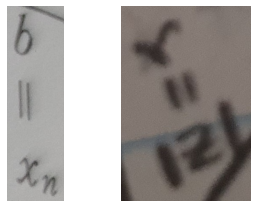

In [3866]:
images = [4441, 7319]
show_multi_images(images, 1, 2, (5, 3))

In [3883]:
gt_all.iloc[7319]

filename         train_07319.jpg
gt          r = \left| z \right|
Name: 7319, dtype: object

### 잘린 수식

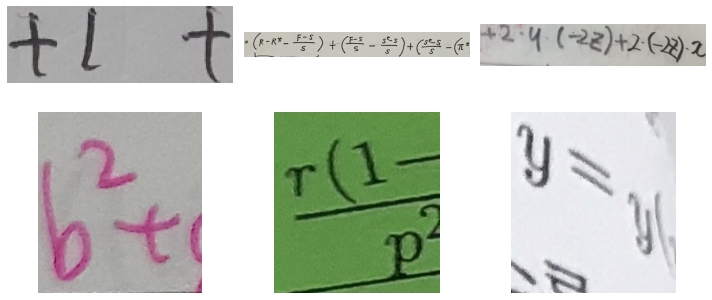

In [3833]:
images = [35414, 98334, 82029, 88991, 40049, 24469]
show_multi_images(images, 2, 3, (10, 5))

### 마지막 점
* 77047, 74501, 71594 포함

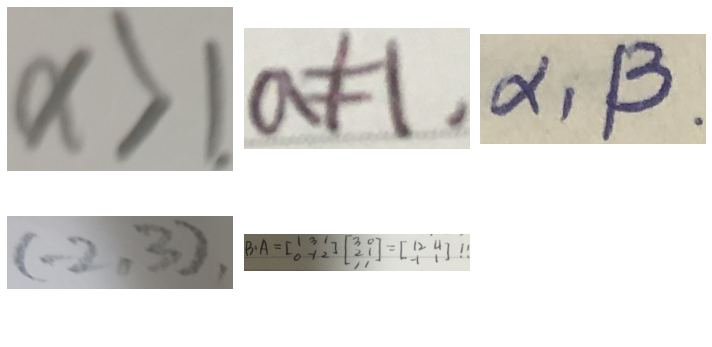

In [3838]:
images = [26726, 77047, 2065, 74501, 71594]
show_multi_images(images, 2, 3, (10, 5))

In [3885]:
gt_all.iloc[[26726, 77047, 2065, 74501, 71594]]

filename                                                 gt
26726  train_26726.jpg                                              x > 1
77047  train_77047.jpg                                         a \neq 1 ,
2065   train_02065.jpg                                   \alpha , \beta .
74501  train_74501.jpg                           \left( - 2 , 3 \right) ,
71594  train_71594.jpg  B \cdot A = \left[ \begin{matrix} 1 & 3 & 1 \\...

### +

/opt/ml/input/data/train_dataset/images/train_35414.jpg


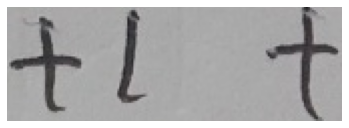

['+', '1', '+']


In [3840]:
show_image(35414)

### 반복(유사) 데이터

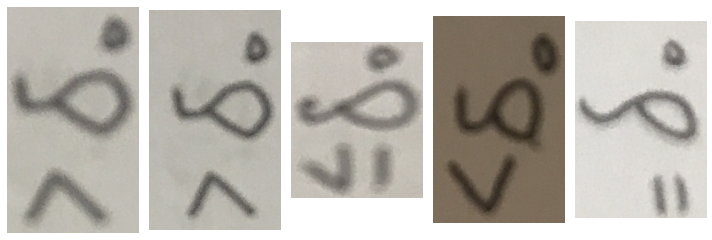

In [3867]:
images = [24655, 14457, 36594, 84789, 81802]
show_multi_images(images, 1, 5, (10, 5))

In [3886]:
gt_all.iloc[[24655, 14457, 36594, 84789, 81802]]

filename                gt
24655  train_24655.jpg  > \delta _ { 0 }
14457  train_14457.jpg  > \delta _ { 0 }
36594  train_36594.jpg   \leq \delta _ 0
84789  train_84789.jpg  < \delta _ { 0 }
81802  train_81802.jpg      = \delta _ 0

## 종합선물세트
- 65867 - 수식 이외의 글자, highlight, 기울어짐, 뒤틀림, subscript, 곱하기, 2가 맞나?
- 41498 - 밑줄 + 형광펜, f를 알아볼 수 있을까?, 저해상도
- 53142 - 글자 위에 줄, 공책 줄, 숫자와 = 사이 넓은 간격, 8 주위 동그라미
- 26726 - 저해상도, 마지막 점, x or alpha?
- 60478 - 공책 줄 빗겨서 쓴 글씨, 펜 밑줄, 글씨와 겹친 동그라미, 마지막 글자는 무엇?
- 49581 - 기울어짐, 뒤틀림, 글씨체, 수식 이외의 글씨, 공책 줄(기울어짐)
- 58664 - 분수 가운데 정렬 안 됨, 심하게 기울어짐(90도까지는 아님), 제외해야 할 글자
- 65113 - 글씨 비침, 윗줄 수식, 아래 동그라미, Z 대소문자, 분수와 비율 안 맞음
- 65502 - 대문자처럼 보이는 소문자 x, 글씨 크기 매우 다름, **두 개의 수식(?)**, 아래 식은 무시해야 함, 왼쪽 식은 포함해야 함
- 36449 - 공책 줄과 겹친 분수 선, 기울어짐, 번분수, x가 다 다름(alpha와 구분 안됨), 빨간 선들, 분수 중심 안 맞음
- 65327 - 정체가 뭘까?
- 64793 - 휘어진 종이, 일부 초점 안 맞음, 빛 반사, 윗줄 글씨, 갈색 배경

수식 이외의 글자, highlight, 기울어짐, 뒤틀림, subscript, 곱하기, 2가 맞나?
/opt/ml/input/data/train_dataset/images/train_65867.jpg


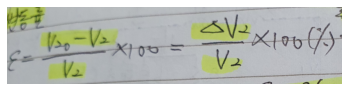


글자 위에 줄, 공책 줄, 숫자와 = 사이 넓은 간격, 8 주위 동그라미
/opt/ml/input/data/train_dataset/images/train_53142.jpg


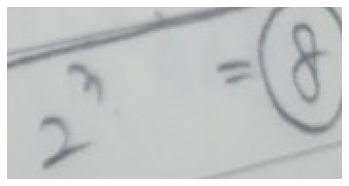


공책 줄 빗겨서 쓴 글씨, 펜 밑줄, 글씨와 겹친 동그라미, 마지막 글자는 무엇?
/opt/ml/input/data/train_dataset/images/train_60478.jpg


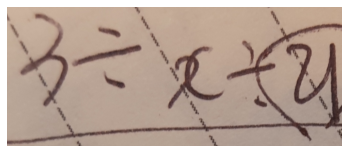


글씨 비침, 윗줄 수식, 아래 동그라미, Z 대소문자, 분수와 비율 안 맞음
/opt/ml/input/data/train_dataset/images/train_65113.jpg


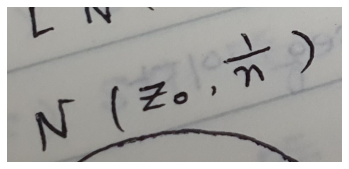


대문자처럼 보이는 소문자 x, 글씨 크기 매우 다름, **두 개의 수식(?)**, 아래 식은 무시해야 함, 왼쪽 식은 포함해야 함
/opt/ml/input/data/train_dataset/images/train_65502.jpg


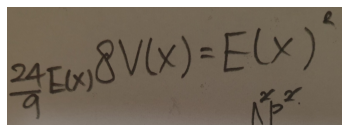


공책 줄과 겹친 분수 선, 기울어짐, 번분수, x가 다 다름(alpha와 구분 안됨), 빨간 선들, 분수 중심 안 맞음
/opt/ml/input/data/train_dataset/images/train_36449.jpg


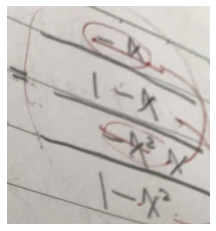


정체가 뭘까?
/opt/ml/input/data/train_dataset/images/train_65327.jpg


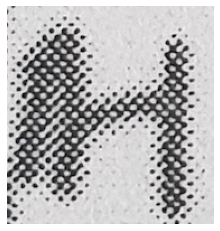


휘어진 종이, 일부 초점 안 맞음, 빛 반사, 윗줄 글씨, 갈색 배경
/opt/ml/input/data/train_dataset/images/train_64793.jpg


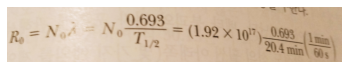

In [3857]:
images = [65867,53142,60478,65113,65502,36449,65327,64793]
comments = ["수식 이외의 글자, highlight, 기울어짐, 뒤틀림, subscript, 곱하기, 2가 맞나?",
#             "밑줄 + 형광펜, f를 알아볼 수 있을까?, 저해상도",
            "글자 위에 줄, 공책 줄, 숫자와 = 사이 넓은 간격, 8 주위 동그라미",
#             "저해상도, 마지막 점, x or alpha?",
            "공책 줄 빗겨서 쓴 글씨, 펜 밑줄, 글씨와 겹친 동그라미, 마지막 글자는 무엇?",
#             "기울어짐, 뒤틀림, 글씨체, 수식 이외의 글씨, 공책 줄(기울어짐)",
#             "분수 가운데 정렬 안 됨, 심하게 기울어짐(90도까지는 아님), 제외해야 할 글자",
            "글씨 비침, 윗줄 수식, 아래 동그라미, Z 대소문자, 분수와 비율 안 맞음",
            "대문자처럼 보이는 소문자 x, 글씨 크기 매우 다름, **두 개의 수식(?)**, 아래 식은 무시해야 함, 왼쪽 식은 포함해야 함",
            "공책 줄과 겹친 분수 선, 기울어짐, 번분수, x가 다 다름(alpha와 구분 안됨), 빨간 선들, 분수 중심 안 맞음",
            "정체가 뭘까?",
            "휘어진 종이, 일부 초점 안 맞음, 빛 반사, 윗줄 글씨, 갈색 배경",]

for idx, cmt in zip(images, comments):
    print(cmt)
    show_image(idx, show_gt=False)
    print()